 ______________________________________________
 
 #  Spotipy - Overview
***
 ______________________________________________
 
 ### Utilizing Spotify's API 'spotipy' this notebook will create a connection to the users Spotify account and then go through the data architecture followed by so analytics.
 
 <br></br>
 <br></br>
 
 **Note:** Before working with this notebook you need to make sure these are true:
 
 - you have registered with Spotify as a developer
 - local conda enviorment has installed each of the required modules

<br></br>

Reference the <a href="https://spotipy.readthedocs.io/en/2.13.0/">spotipy docs</a>, provides a better understanding of the API



Reference <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/">Spotify developer</a>, provides a better understanding of the data stucture

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json

import matplotlib.pyplot as plt
import matplotlib.style as style 

import seaborn as sns

In [2]:
# Public key for the projects spotify developer app
client_id = '5572530ac0664df2b34373f3f41db89b' # May need to insert personal developer key

# Private key for the projects spotify developer app
client_secret = '15734ca0cac44e3c8ee4cc238bc895cf' # May need to insert personal developer key

# A set of strings describing playlist URIs. Playlists are public so no need to aquire authentication 
uri_playL_list = ['spotify:user:22okarqslvrgo5yvlkkfvr64a:playlist:37i9dQZF1DXdgz8ZB7c2CP', 
                  'spotify:user:22okarqslvrgo5yvlkkfvr64a:playlist:6tJ0eB80eKJtFDvK3pJ7H3',
                  'spotify:user:22okarqslvrgo5yvlkkfvr64a:playlist:17resVfiqMumDlv5Ffmts6', 
                  'spotify:user:22okarqslvrgo5yvlkkfvr64a:playlist:4WRdMMQSDWPqkBlrt7iERG']

playlists = [ '37i9dQZF1DXdgz8ZB7c2CP', 
              '6tJ0eB80eKJtFDvK3pJ7H3',
              '17resVfiqMumDlv5Ffmts6', 
              '4WRdMMQSDWPqkBlrt7iERG' ]

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
playlist_tracks = sp.user_playlist(user='22okarqslvrgo5yvlkkfvr64a', playlist_id=playlists[0], fields='tracks')

print(pd.DataFrame(playlist_tracks).columns)
pd.DataFrame(playlist_tracks)

Index(['tracks'], dtype='object')


,tracks
href,https://api.spotify.com/v1/playlists/37i9dQZF1...
items,"[{'added_at': '2020-06-11T18:43:32Z', 'added_b..."
limit,100
next,https://api.spotify.com/v1/playlists/37i9dQZF1...
offset,0
previous,None
total,235


In [5]:
print(pd.DataFrame(playlist_tracks['tracks']).columns)
pd.DataFrame(playlist_tracks['tracks']).iloc[0:5]

Index(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'], dtype='object')


,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/37i9dQZF1...,"{'added_at': '2020-06-11T18:43:32Z', 'added_by...",100,https://api.spotify.com/v1/playlists/37i9dQZF1...,0,None,235
1,https://api.spotify.com/v1/playlists/37i9dQZF1...,"{'added_at': '2020-06-11T18:43:32Z', 'added_by...",100,https://api.spotify.com/v1/playlists/37i9dQZF1...,0,None,235
2,https://api.spotify.com/v1/playlists/37i9dQZF1...,"{'added_at': '2020-06-11T18:43:32Z', 'added_by...",100,https://api.spotify.com/v1/playlists/37i9dQZF1...,0,None,235
3,https://api.spotify.com/v1/playlists/37i9dQZF1...,"{'added_at': '2020-06-11T18:43:32Z', 'added_by...",100,https://api.spotify.com/v1/playlists/37i9dQZF1...,0,None,235
4,https://api.spotify.com/v1/playlists/37i9dQZF1...,"{'added_at': '2020-06-11T18:43:32Z', 'added_by...",100,https://api.spotify.com/v1/playlists/37i9dQZF1...,0,None,235


In [6]:
print(pd.DataFrame(playlist_tracks['tracks']['items']).columns)
pd.DataFrame(playlist_tracks['tracks']['items']).iloc[0:5]

Index(['added_at', 'added_by', 'is_local', 'primary_color', 'track',
       'video_thumbnail'],
      dtype='object')


,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2020-06-11T18:43:32Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
1,2020-06-11T18:43:32Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2020-06-11T18:43:32Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
3,2020-06-11T18:43:32Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
4,2020-06-11T18:43:32Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}


In [7]:
results = playlist_tracks['tracks']['items']
track_ids = list()
for track in results:
        track_ids.append(track['track']['id'])
        art = list()
        for artist in track['track']['artists']:
            art.append(artist['name'])
        print(track['track']['name'][:12], '\n', art, '\n\n\t ----------------\n')

Solo 
 ['Jay Daniel'] 

	 ----------------

Skin 
 ['Manila Killa', 'outsideOUTSIDE'] 

	 ----------------

Feelings 
 ['Hexnote'] 

	 ----------------

Killing Our  
 ['Nonthapha'] 

	 ----------------

Air 
 ['CloZee', 'Sauvane'] 

	 ----------------

Forget the M 
 ['Nick Bateman', 'Alan Watts'] 

	 ----------------

Broken Brick 
 ['DROELOE', 'Kalulu'] 

	 ----------------

Seek 
 ['Raed Raees'] 

	 ----------------

Part of You  
 ['Ed Geater', 'ENiGMA Dubz'] 

	 ----------------

Souls 
 ['About You'] 

	 ----------------

Wait For You 
 ['pronouncedyea', 'Olmos', 'KnownAsNat'] 

	 ----------------

I Don't Wann 
 ['BLVTH', 'bülow'] 

	 ----------------

Blood 
 ['Mindchatter'] 

	 ----------------

Myelin (Moon 
 ['Arthur Moon', 'Moonheart'] 

	 ----------------

Imagination 
 ['iGerman', 'xoedoxo'] 

	 ----------------

Thief 
 ['Nick AM'] 

	 ----------------

FUSE 
 ['Hudson Mohawke'] 

	 ----------------

like u do (c 
 ['Marian Hill', 'clear eyes'] 

	 ----------------

Wai

As shown above we have successfuly exctracted the song and it's associated artists for every track in a provided playlist. 
<br></br>
We are going to want to expand on this by saving the unique id for each song. 
<br></br>
Doing this will then allow us to retrieve the <code>audio_analysis()</code> for each song. 
<br></br>
We will then repeat the same process for each artist. 
<br></br>
Additionally we only found tracks for one playlist but we will need to be capable of handling an array of playlists. 

<br></br><br></br>
***
***
## Audio Analysis for a single track

<br></br>
<code>get_track_analysis(song_id)</code>
This is the function we intend to derive from this section

In [8]:
for track in results:
    tmp_2 = pd.DataFrame(track)
    
tmp_2

,added_at,added_by,is_local,primary_color,track,video_thumbnail
album,2020-06-11T18:43:32Z,NaN,False,None,"{'album_type': 'album', 'artists': [{'external...",NaN
artists,2020-06-11T18:43:32Z,NaN,False,None,[{'external_urls': {'spotify': 'https://open.s...,NaN
available_markets,2020-06-11T18:43:32Z,NaN,False,None,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",NaN
disc_number,2020-06-11T18:43:32Z,NaN,False,None,1,NaN
duration_ms,2020-06-11T18:43:32Z,NaN,False,None,272227,NaN
episode,2020-06-11T18:43:32Z,NaN,False,None,False,NaN
explicit,2020-06-11T18:43:32Z,NaN,False,None,True,NaN
external_ids,2020-06-11T18:43:32Z,NaN,False,None,{'isrc': 'QM24S1830772'},NaN
external_urls,2020-06-11T18:43:32Z,{'spotify': 'https://open.spotify.com/user/'},False,None,{'spotify': 'https://open.spotify.com/track/2F...,NaN
href,2020-06-11T18:43:32Z,https://api.spotify.com/v1/users/,False,None,https://api.spotify.com/v1/tracks/2FUl7D9C2AQy...,NaN


In [9]:
song_df = pd.DataFrame(columns=['song name', 'song id'])
i = 0
for track in results:
    var_1 = track['track']['name']
    var_2 = track['track']['id']
    # Will eventually also need to store artists - artist_related_artists(artist_id)
    song_df.loc[i] = [var_1, var_2]
    i = i+1

In [10]:
song_df.head()

,song name,song id
0,Solo,5kDJIZgf2UhN4W9C5hkXVE
1,Skin,7EtRjxGWJcM0O4kyCJghJ9
2,Feelings,5pvUElpx0OCTzIjvf4a8N6
3,Killing Our Dream,4UuiFVv1eLke5fLRio4sC4
4,Air,5civ0uLZalJIC9JGJ2Xa4p


In [11]:
song_id = song_df.head(1)['song id'].values[0]
analyzed = sp.audio_analysis(song_id)
analyzed

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1584517058,
  'analysis_time': 7.38049,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 5563363,
  'duration': 252.30672,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.15669,
  'start_of_fade_out': 241.17406,
  'loudness': -9.227,
  'tempo': 136.092,
  'tempo_confidence': 0.72,
  'time_signature': 4,
  'time_signature_confidence': 0.981,
  'key': 6,
  'key_confidence': 0.453,
  'mode': 1,
  'mode_confidence': 0.501,
  'codestring': 'eJxVnImVLLmRBFUpEXAf-iu2Zo7s2U8-zrCBykTiiMPDI8C-djuzlv0rv1PLvaWdX-WfvnY5Zd_zm3v9xpq3rdbqr5Y2fpe_Zu-1_OoYxb7ZeeC2X113_Va9a9W69q-ec_z5tHJX3b_WO4N1fj9nrF_bZ9jsZ81Tfr2V8jVLrUxhHMcqp9Y6f6O8odsag1_HHON3Sttr9strdxUnvvlaa785ynGaZ7e5-2-euX59VD87GqPwbpvljt75a_UyXHAbi3n_1p7NZl-l9fvbZf81-yy_7SRrZUf67OO3V3V72IB-T2NCa9

In [12]:
analyzed.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

***
##### Bars

In [13]:
print(pd.DataFrame(analyzed['bars']).head())
pd.DataFrame(analyzed['bars']).tail()

   confidence  duration    start
0       0.143   1.76304  0.62172
1       0.215   1.76117  2.38477
2       0.371   1.76564  4.14594
3       0.178   1.76524  5.91158
4       0.165   1.76350  7.67683


,confidence,duration,start
130,0.566,2.33709,235.54651
131,0.780,2.32407,237.88360
132,0.184,2.32949,240.20767
133,0.707,2.37061,242.53716
134,0.048,3.51484,244.90776


***
##### Beats

In [14]:
print(pd.DataFrame(analyzed['beats']).head())
pd.DataFrame(analyzed['beats']).tail()

   confidence  duration    start
0       1.000   0.43401  0.18771
1       0.936   0.44158  0.62172
2       0.761   0.44067  1.06330
3       0.849   0.44058  1.50397
4       0.801   0.44021  1.94456


,confidence,duration,start
538,0.343,0.58654,246.66498
539,0.544,0.58467,247.25151
540,0.467,0.58642,247.83618
541,0.570,0.59449,248.42260
542,0.152,0.59449,249.01709


***
##### Sections

In [15]:
pd.DataFrame(analyzed['sections'])

,confidence,duration,key,key_confidence,loudness,mode,mode_confidence,start,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1.000,9.44033,6,0.460,-21.545,1,0.382,0.00000,136.321,0.755,4,0.250
1,0.781,56.88192,6,0.292,-8.205,1,0.314,9.44033,136.081,0.759,4,1.000
2,0.242,13.67414,6,0.000,-7.880,1,0.000,66.32225,136.123,0.716,4,1.000
3,0.283,32.64060,6,0.000,-7.785,1,0.000,79.99639,136.057,0.723,4,1.000
4,0.398,15.43216,3,0.000,-7.699,0,0.128,112.63699,136.109,0.562,4,1.000
5,0.432,8.81684,6,0.463,-6.999,1,0.261,128.06915,136.194,0.456,4,1.000
6,0.465,34.83720,3,0.184,-6.833,0,0.332,136.88600,136.162,0.465,4,1.000
7,0.004,35.28434,6,0.428,-11.794,1,0.637,171.72320,136.105,0.691,4,1.000
8,0.985,13.32916,6,0.646,-31.973,1,0.650,207.00752,105.329,0.554,3,0.706
9,1.000,23.37740,3,0.217,-10.531,0,0.314,220.33670,102.553,0.536,3,0.000


***
##### Segments

In [16]:
pd.DataFrame(analyzed['segments'])

,confidence,duration,loudness_end,loudness_max,loudness_max_time,loudness_start,pitches,start,timbre
0,0.000,0.15669,0.0,-60.000,0.00000,-60.000,"[0.729, 0.659, 0.847, 0.763, 0.728, 0.829, 0.8...",0.00000,"[0.06, 172.889, 9.579, -30.582, 58.116, -51.39..."
1,1.000,0.43075,0.0,-17.386,0.04434,-60.000,"[0.077, 0.031, 0.015, 0.596, 0.095, 0.03, 0.56...",0.15669,"[34.189, 37.63, -119.278, 16.049, 103.718, 65...."
2,0.994,0.27306,0.0,-18.270,0.02297,-31.596,"[0.102, 0.026, 0.011, 0.409, 0.082, 0.025, 0.9...",0.58744,"[35.725, -8.598, -157.933, 15.067, 123.134, -7..."
3,0.132,0.17719,0.0,-27.831,0.08180,-30.280,"[0.1, 0.023, 0.014, 0.512, 0.127, 0.046, 1.0, ...",0.86050,"[30.795, -220.595, -85.935, -67.06, 52.927, -4..."
4,0.923,0.44032,0.0,-17.842,0.01424,-30.436,"[0.04, 0.01, 0.007, 0.148, 0.022, 0.011, 0.267...",1.03769,"[32.864, 18.718, -205.826, 79.829, 99.995, -76..."
5,1.000,0.22762,0.0,-16.482,0.05074,-40.547,"[0.043, 0.361, 0.088, 0.04, 0.021, 0.324, 0.77...",1.47800,"[37.627, 28.646, -113.317, -28.586, 101.564, 2..."
6,0.154,0.21719,0.0,-21.473,0.01392,-26.365,"[0.028, 0.815, 0.142, 0.02, 0.016, 0.707, 1.0,...",1.70562,"[34.257, -152.66, -97.421, -12.177, 67.852, -7..."
7,0.923,0.31229,0.0,-18.035,0.01112,-30.310,"[0.009, 0.369, 0.053, 0.012, 0.004, 0.136, 1.0...",1.92281,"[36.813, -7.685, -146.655, 24.571, 99.182, -58..."
8,0.143,0.12794,0.0,-27.553,0.05122,-30.219,"[0.037, 0.375, 0.166, 0.083, 0.201, 0.773, 0.5...",2.23510,"[31.819, -216.61, -66.91, -61.544, 51.648, -50..."
9,0.908,0.44254,0.0,-16.774,0.01008,-29.021,"[0.008, 0.597, 0.067, 0.013, 0.011, 0.296, 1.0...",2.36304,"[33.938, 0.97, -194.247, 79.288, 106.124, -82...."


***
##### Tatums

In [17]:
print(pd.DataFrame(analyzed['tatums']).head())
pd.DataFrame(analyzed['tatums']).tail()

   confidence  duration    start
0       1.000   0.28934  0.18771
1       1.000   0.14467  0.47705
2       0.936   0.29439  0.62172
3       0.936   0.14719  0.91611
4       0.761   0.29378  1.06330


,confidence,duration,start
1081,0.467,0.19547,248.22713
1082,0.570,0.39633,248.42260
1083,0.570,0.19816,248.81892
1084,0.152,0.39633,249.01709
1085,0.152,0.39633,249.41342


In [18]:
tester = analyzed
meta_var_analyze = tester.pop('meta')

In [19]:
track_var_analyze = tester.pop('track')

In [20]:
analyzed_obj = dict()
for metric in ['bars', 'beats', 'sections', 'segments', 'tatums']:
    analyzed_obj[metric] = tester[metric]
    

In [21]:
pd.DataFrame(analyzed_obj['bars']).head()

,confidence,duration,start
0,0.143,1.76304,0.62172
1,0.215,1.76117,2.38477
2,0.371,1.76564,4.14594
3,0.178,1.76524,5.91158
4,0.165,1.76350,7.67683


We will use this <code>analyzed_obj</code> object to represent the metrics of a song but only temporarily. <br></br>
<code>analyzed_obj</code> is a dictionary where its keys retrieve their respective dataframe. <br></br> 
This will work great for now but for our model to be effective we will have to stitch them together using the 'start' column. By measuring the ranks of each dataframe we can use the 'duration' column to perform **imputation** to balance their ranks.  

<br></br><br></br>
***
***
## Audio Features for a list of tracks

<br></br>
<code>get_track_features(song_id_list)</code>
This is the function we intend to derive from this section

In [22]:
song_id_list = song_df['song id'].values

In [23]:
featured = sp.audio_features(song_id_list)
featured = pd.DataFrame(featured)
featured

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.31500,https://api.spotify.com/v1/audio-analysis/5kDJ...,0.737,252307,0.549,5kDJIZgf2UhN4W9C5hkXVE,0.930000,6,0.0874,-9.227,1,0.1050,136.092,4,https://api.spotify.com/v1/tracks/5kDJIZgf2UhN...,audio_features,spotify:track:5kDJIZgf2UhN4W9C5hkXVE,0.3780
1,0.39500,https://api.spotify.com/v1/audio-analysis/7EtR...,0.497,193183,0.747,7EtRjxGWJcM0O4kyCJghJ9,0.000000,0,0.0991,-5.455,1,0.0704,154.052,4,https://api.spotify.com/v1/tracks/7EtRjxGWJcM0...,audio_features,spotify:track:7EtRjxGWJcM0O4kyCJghJ9,0.2090
2,0.60200,https://api.spotify.com/v1/audio-analysis/5pvU...,0.798,181091,0.198,5pvUElpx0OCTzIjvf4a8N6,0.469000,10,0.1060,-13.329,1,0.0500,109.972,4,https://api.spotify.com/v1/tracks/5pvUElpx0OCT...,audio_features,spotify:track:5pvUElpx0OCTzIjvf4a8N6,0.1190
3,0.43400,https://api.spotify.com/v1/audio-analysis/4Uui...,0.742,166200,0.456,4UuiFVv1eLke5fLRio4sC4,0.015700,11,0.2630,-12.678,1,0.0552,99.998,4,https://api.spotify.com/v1/tracks/4UuiFVv1eLke...,audio_features,spotify:track:4UuiFVv1eLke5fLRio4sC4,0.6210
4,0.43700,https://api.spotify.com/v1/audio-analysis/5civ...,0.615,265921,0.571,5civ0uLZalJIC9JGJ2Xa4p,0.068600,6,0.0405,-7.712,0,0.0297,129.991,4,https://api.spotify.com/v1/tracks/5civ0uLZalJI...,audio_features,spotify:track:5civ0uLZalJIC9JGJ2Xa4p,0.1420
5,0.22300,https://api.spotify.com/v1/audio-analysis/3rjb...,0.470,160000,0.717,3rjb2PTHoIEccLRhXKSGje,0.568000,8,0.3140,-5.889,0,0.3080,149.930,4,https://api.spotify.com/v1/tracks/3rjb2PTHoIEc...,audio_features,spotify:track:3rjb2PTHoIEccLRhXKSGje,0.5160
6,0.11100,https://api.spotify.com/v1/audio-analysis/7vR0...,0.847,212022,0.771,7vR0lb6PflAiv4ftWWjEha,0.618000,6,0.1310,-4.705,0,0.0345,129.001,4,https://api.spotify.com/v1/tracks/7vR0lb6PflAi...,audio_features,spotify:track:7vR0lb6PflAiv4ftWWjEha,0.4260
7,0.08910,https://api.spotify.com/v1/audio-analysis/6gzo...,0.364,183507,0.421,6gzo8JjXS5LnZiIMnxeUeL,0.043000,9,0.1490,-10.738,0,0.0450,120.004,4,https://api.spotify.com/v1/tracks/6gzo8JjXS5Ln...,audio_features,spotify:track:6gzo8JjXS5LnZiIMnxeUeL,0.1570
8,0.01100,https://api.spotify.com/v1/audio-analysis/1cPA...,0.483,325714,0.633,1cPA8fsDcvFNNratIThOdx,0.043500,6,0.1870,-7.831,0,0.0348,140.004,4,https://api.spotify.com/v1/tracks/1cPA8fsDcvFN...,audio_features,spotify:track:1cPA8fsDcvFNNratIThOdx,0.1100
9,0.30400,https://api.spotify.com/v1/audio-analysis/7tBC...,0.422,187575,0.538,7tBCIlqDG6UVaSw4K1XjQM,0.054700,8,0.6570,-8.138,0,0.0434,175.735,4,https://api.spotify.com/v1/tracks/7tBCIlqDG6UV...,audio_features,spotify:track:7tBCIlqDG6UVaSw4K1XjQM,0.2080


In [24]:
featured.columns

Index(['acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [32]:
# The reference for this styling:
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
style.use('seaborn-poster')
style.use('ggplot')

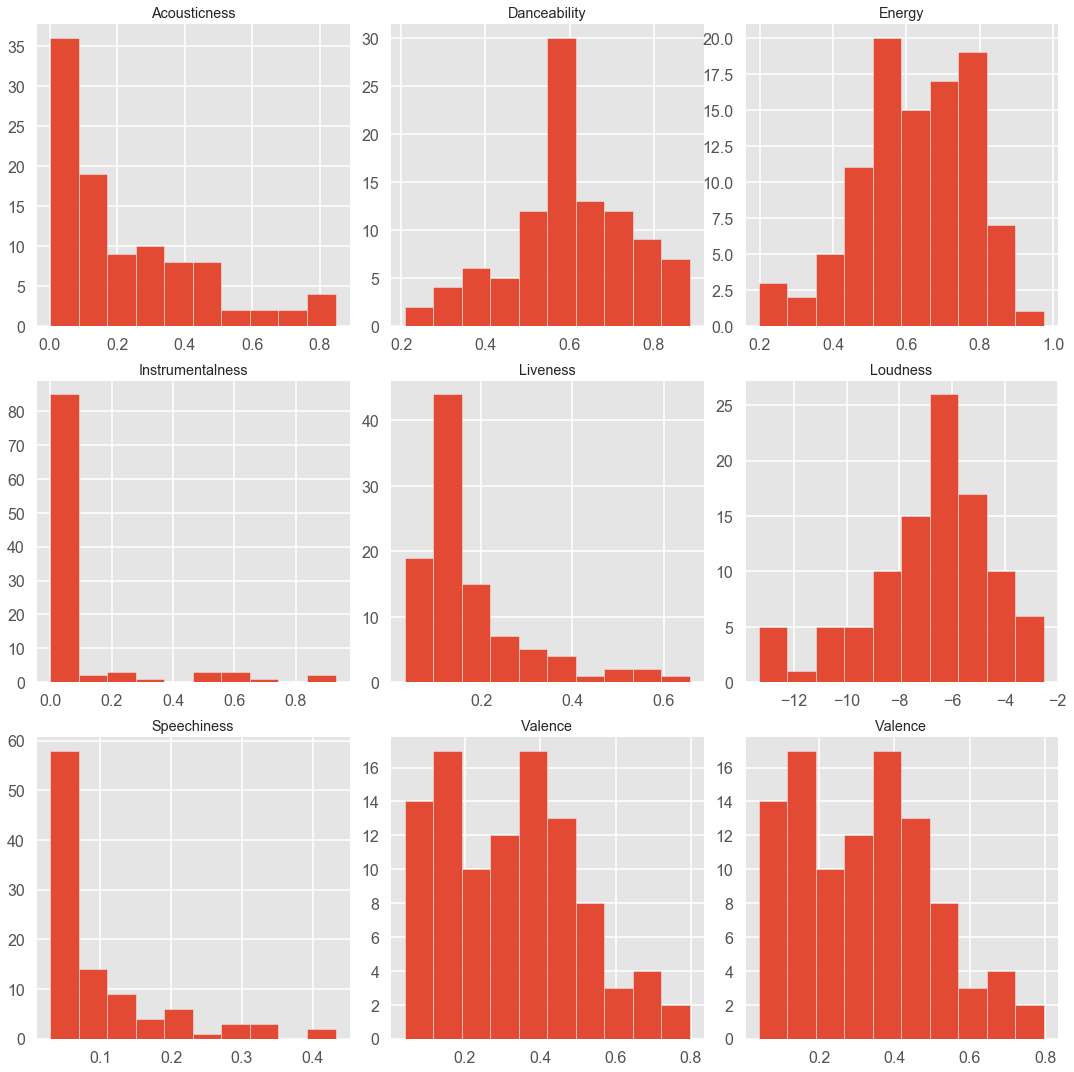

In [33]:
fig1, axs= plt.subplots(figsize=(15,15),nrows=3, ncols=3)

axs[0, 0].hist(featured['acousticness'])
axs[0, 0].set_title("Acousticness")


axs[0,1].hist(featured['danceability'])
axs[0,1].set_title('Danceability')


axs[0, 2].hist(featured['energy'])
axs[0, 2].set_title('Energy')


axs[1,0].hist(featured['instrumentalness'])
axs[1,0].set_title('Instrumentalness')


axs[1, 1].hist(featured['liveness'])
axs[1, 1].set_title('Liveness')


axs[1,2].hist(featured['loudness'])
axs[1,2].set_title('Loudness')


axs[2, 0].hist(featured['speechiness'])
axs[2, 0].set_title('Speechiness')


axs[2,1].hist(featured['valence'])
axs[2,1].set_title('Valence')

axs[2,2].hist(featured['valence'])
axs[2,2].set_title('Valence')


plt.tight_layout()